# **Title**: Evaluating Aqueous Solubility Model's(eos6oli) Bias On Predicting With 1000 Molecules.

**Aim:**
*   Source for 1000 molecules from the public repositories.
*   Run prediction on the 1000 molecules using the model Solubility Prediction Model(eos6oli).
*   Check for model's bias, evaluate, and visualize the model's performance.

**Source:**
*   The dataset used for this project was sourced from the public repository of [Harvard Dataverse](https://dataverse.harvard.edu/). I especially employed this dataset because it has a column containing values for log solubility and a column for SMILES as well, which is related to the primary task the model was built to act on.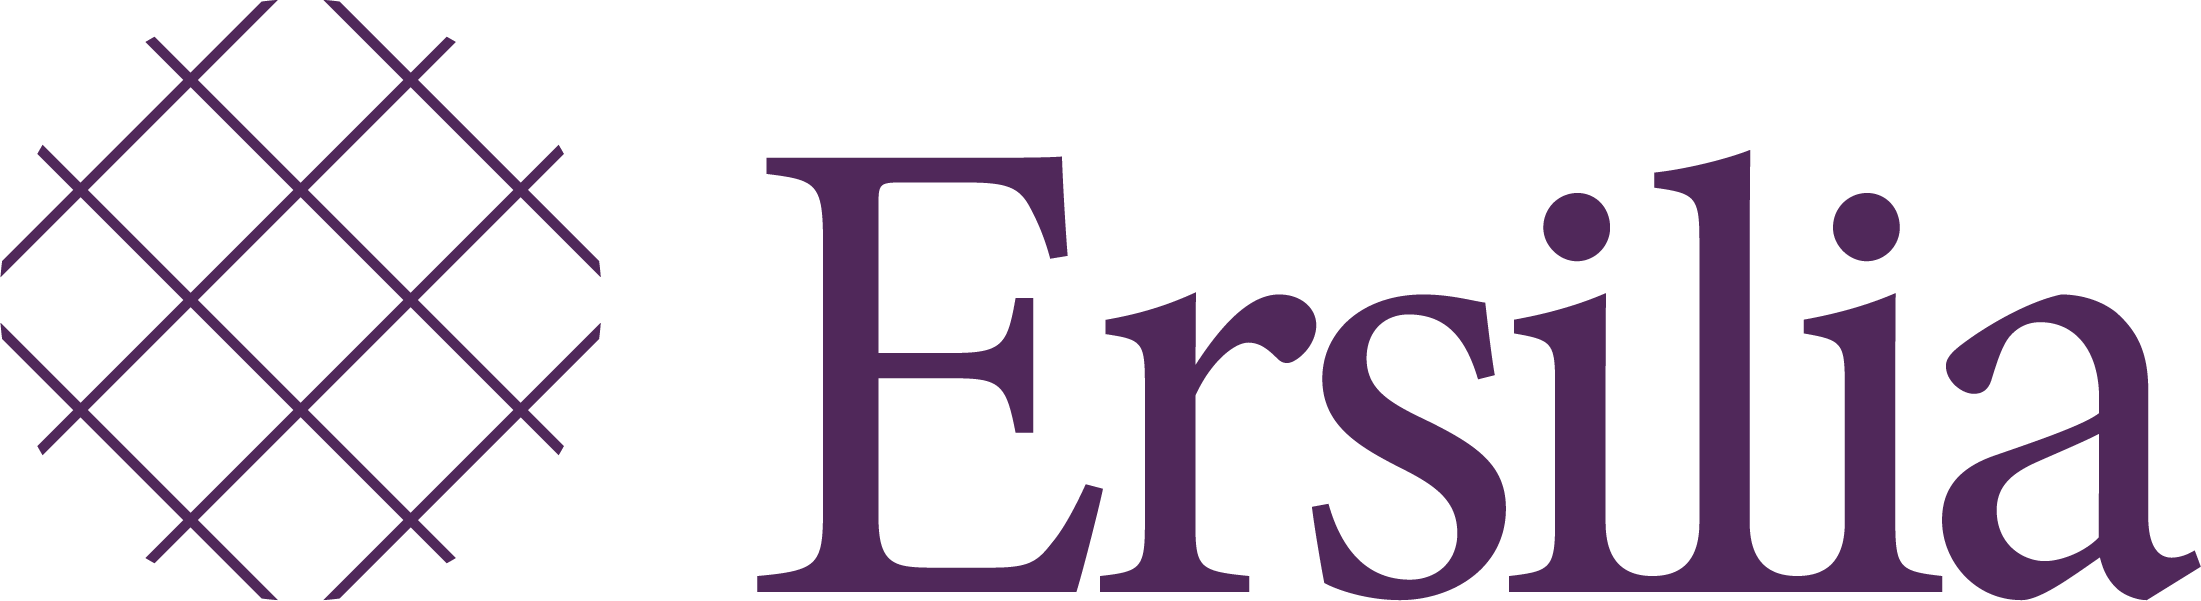

**By: Nwuguru Chidiebere Sullivan**

---



# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sys
sys.path.append('/content/drive/MyDrive/ersilia/src')

In [3]:
#let's first install rdkit & standardiser
!pip install rdkit
!pip install standardiser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.4/698.4 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for standardiser: filename=standardiser-0.1.9-py3-none-any.whl size=720101 sha256=8814c79d19e41a5c347ea2e9b245c092bd86a9271a0827e0659de4b1fba90b8d
  Stored in directory: /root/.cache/pip/wheels/eb/62/4b/6044430bf5a732d53bd0d1aa165c928954d9f87cd92529f00f
Successfully built standardiser




---



# Data Cleaning, Wrangling, And Preprocessing:

In [4]:
# @title 🗃️ Mount Google Drive For Easy Access To Files:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# @title 🔃 Let's load our dataset into a DataFrame and have a view of it
sol_df = pd.read_csv('/content/drive/MyDrive/ersilia/data/solubility-dataset.csv')
sol_df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [6]:
#let's get the general info of the data
sol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [7]:
# @title 📅 Let's select our important columns since we will not be needing all of them
columns = ['InChIKey', 'SMILES', 'Solubility']
sol_df_new = sol_df.loc[:, columns]
sol_df_new.tail()

,InChIKey,SMILES,Solubility
9977,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.01
9978,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.93
9979,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.19
9980,SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.98
9981,PJVWKTKQMONHTI-UHFFFAOYSA-N,CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O,-4.78


**Let's employ some of the functions I had defined earlier which in the src folder; these functions will standardize our SMILES and InChiKeys::**

In [8]:
from functions import standardise_smiles, standardise_inchikey


#Standardizing the SMILES string and inchikey
sol_df_new['smiles'] = standardise_smiles(sol_df_new['SMILES'])
sol_df_new['Inchi_Key'] = standardise_inchikey(sol_df_new['InChIKey'])

#drop redundant columns
sol_df_new.drop(columns={'SMILES', 'InChIKey'}, inplace=True)
print(sol_df_new.head())
sol_df_new.info()

[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:57] WARNING: not removing hydrogen atom without neighbors
[21:44:58] WARNING: not removing hydrogen atom without neighbors
[21:44:58] WARNING: not removing hydrogen atom without neighbors
[21:44:58] WARNING: not removing hydrogen atom without neighbors
[21:44:58] WARNING: not r

   Solubility                                             smiles  \
0   -3.616127                      CCCCCCCCCCCCCCCCCC[N+](C)(C)C   
1   -3.254767                               O=C1Nc2cccc3cccc1c23   
2   -2.177078                                    O=Cc1ccc(Cl)cc1   
3   -3.924409                                                NaN   
4   -4.662065  c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...   

                     Inchi_Key  
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M  
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N  
2  AVPYQKSLYISFPO-UHFFFAOYSA-N  
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L  
4  FAUAZXVRLVIARB-UHFFFAOYSA-N  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Solubility  9982 non-null   float64
 1   smiles      9157 non-null   object 
 2   Inchi_Key   9982 non-null   object 
dtypes: float64(1), object(2)
memory usage: 234.1+ KB


In [9]:
# @title 🧑‍💻 let's place the solubility column at the end of the dataframe and have InChiKey be the first column for better references
end_cols = ['smiles', 'Solubility']
other_cols = [col for col in sol_df_new.columns if col not in end_cols]
std_df = sol_df_new[other_cols + end_cols]
std_df.head()

,Inchi_Key,smiles,Solubility
0,SZEMGTQCPRNXEG-UHFFFAOYSA-M,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767
2,AVPYQKSLYISFPO-UHFFFAOYSA-N,O=Cc1ccc(Cl)cc1,-2.177078
3,XTUPUYCJWKHGSW-UHFFFAOYSA-L,NaN,-3.924409
4,FAUAZXVRLVIARB-UHFFFAOYSA-N,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065


In [10]:
#let's check if there are missing values in our data
sol_df_new.isnull().sum()

Solubility      0
smiles        825
Inchi_Key       0
dtype: int64

*Comments:*

*   There are missing values in our smiles column and should be dropped so they don't get sampled during our sampling for 1000 molecules.


In [11]:
#drop missing values
sol_df_new.dropna(inplace=True)
sol_df_new.isna().sum()

Solubility    0
smiles        0
Inchi_Key     0
dtype: int64

*Comments:*

*   We've successfully dropped the missing values.



In [12]:
#let's check to see if we have duplicates
sol_df_new.duplicated().sum()

0

*Comments*

*   We have no duplicates


**Let's create the 1000 molecules:**

In [13]:
#randomly sample 1000 molecules from the data
molecules_df = sol_df_new.sample(n=1000, random_state=42)
molecules_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1264 to 9569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Solubility  1000 non-null   float64
 1   smiles      1000 non-null   object 
 2   Inchi_Key   1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.2+ KB


In [14]:
# @title 🗂️ let's store this data into a CSV file
path = '/content/drive/MyDrive/ersilia/data/1000_molecules.csv'
molecules_df.to_csv(path, sep=',', index=False, encoding='utf-8')



---



# Deploying Ersilia Ersilia Model Hub To Colab, Fetching and Serving The Model of choice, eos6oli

In [15]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [16]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-23 21:45:39--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   147MB/s    in 0.7s    

2024-03-23 21:45:40 (147 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [17]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-7qa15nb6
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-7qa15nb6
  Resolved https://github.com/ersilia-os/ersilia.git to commit 8bc77c0917794cf2fc8685fe359301a8348617d7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 670 kB 4.9 MB/s 
     |████████████████████████████████| 139 kB 68.3 MB/s 
     |████████████████████████████████| 9.9 MB 46.4 MB/s 
     |████████████████████████████████| 421 kB 40.2 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 148 kB 62.0 MB/s 
     |████████████████████████████████| 4.3 MB 45.9 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |█████████

In [18]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

**Let's specify our folders and filenames:**

In [19]:
#specify input folder
input_folder = '/content/drive/MyDrive/ersilia/data'

#specify the name of the input file
input_filename = "1000_molecules"

#specify the name of the SMILE column
smiles_column = 'smiles'

In [20]:
# @title Let's check how many number of smiles 😄 we have in our dataset
#let's now extract the SMILES into a List
path = "%s/%s.csv" % (input_folder, input_filename)
smiles_column = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smiles_column].tolist()

print(f"My dataset contains {str(len(smiles)) + ' ' + 'SMILES'}")

My dataset contains 1000 SMILES


**Let's fetch and serve our model:**




In [21]:
#assign the model to a name
model = "eos6oli"

#let's fetch the model
import time

begin = time.time()
!ersilia fetch $model
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-yj94igo9
Solving environment: | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |       h06a4308_0 

**Let's serve the model we fetched:**

In [22]:
#serve the model
!ersilia serve $model

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:53551
   PID: 22367
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


**Let's make predictions on the 1000 molecules with our model:**

In [23]:
#let's employ the model to run predictions on the 1000molecules dataset
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2),
      "seconds")
model.close()

Successful 👍! Time taken: 61.15 seconds


In [24]:
# @title 👀 Let's view the predicted output
output

,key,input,solubility
0,IHRACTUONPFMSI-UHFFFAOYSA-N,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,-6.123
1,CPJSUEIXXCENMM-UHFFFAOYSA-N,CCOc1ccc(NC(C)=O)cc1,-2.316
2,JVAZJLFFSJARQM-OZRWLHRGSA-N,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,-0.484
3,OQMBBFQZGJFLBU-UHFFFAOYSA-N,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],-6.831
4,JJCKHVUTVOPLBV-UHFFFAOYSA-N,Cc1cccc(CO)c1,-0.709
...,...,...,...
995,HWSSEYVMGDIFMH-UHFFFAOYSA-N,C=C(C)C(=O)OCCOCCOCCOC(=O)C(=C)C,-1.671
996,OSSQSXOTMIGBCF-UHFFFAOYSA-N,C#CCCCCCCC,-4.155
997,PSQWZQGQIUGIRU-UHFFFAOYSA-N,CC(=O)Nc1ccc(OP(=O)(O)O)cc1,-1.192
998,DLEGDLSLRSOURQ-UHFFFAOYSA-N,C=COCC(F)(F)F,-0.858


In [25]:
# @title 🗃️ let's save the output dataframe into a CSV file that will store our predictions
path = '/content/drive/MyDrive/ersilia/data/eo6oli_pred.csv'
output.to_csv(path, sep=',', index=False, encoding='utf-8')



---



# Model(eso6oli) Bias Evaluation:

In this section, we will:

*   employ the predicted output from the model(eso6oli) by running through the randomly sampled 1000 molecules within the Ersilia Model Hub and see what the distribution of these output predictions is like.
*   evaluate the performance of the model by comparing the predicted output and the actual values.



**NOTE:**

*   For the context of the evaluations below, we should note that compounds whose Log of Solibulity(LogS) values are within the range of 0 and above are classified as highly soluble compounds, those whose LogS values are within the range of 0 to –2 are classified as soluble compounds, while those whose LogS values are within the range of –2 to –4 are classified as slightly soluble compounds, and those with LogS values below –4 as insoluble compounds.





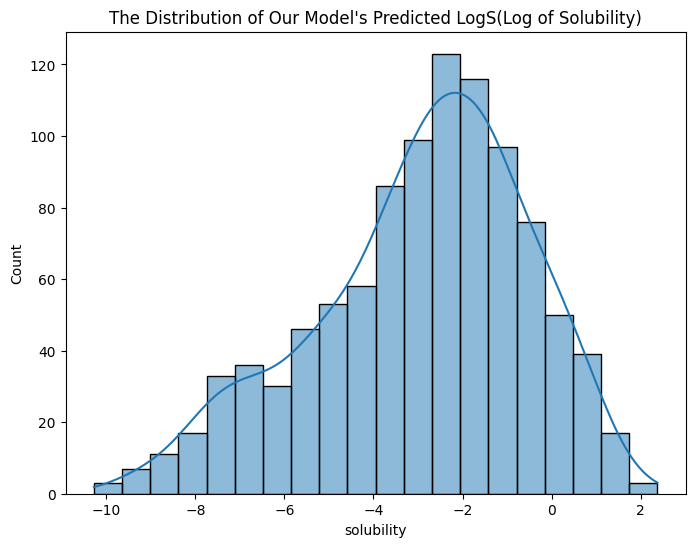

In [26]:
# @title 📊 Let's employ a histogram plot to visualize the distribution of our predictions
fig = plt.figure(figsize=(8,6))
sns.histplot(data=output, x='solubility', bins=20, kde=True)
plt.title("The Distribution of Our Model's Predicted LogS(Log of Solubility)")
plt.savefig('/content/drive/MyDrive/ersilia/figures/1000_Molecules_output_hist_plot.png')
plt.show();

***COMMENTS:***

* Since the range of:
                   0 and above ➡️ highly soluble
                   0 and –2 ➡️ soluble
                   -2 and –4 ➡️ slightly soluble
                   –4 and less ➡️ insoluble
we can see from the distributions of the predicted log of solubility values, that the majority of the compounds fall within the range of –4 and –2, thus, implying that many of the compounds are slightly soluble.




                   
       





In [27]:
# @title let's import a function called solubility_category which will help categorise the solubility values
from functions import solubility_category

*Important background note about the function, solubility_category:*

*   The function, 'solubility_category', which is stored in the [src folder](https://github.com/Nwuguru-Chidiebere-Sullivan/Outreachy-Ersilia-Project-Week2-Tasks/blob/main/src/functions.py), is defined based on the context of the solubility values evaluations as described in the publication, which implies that:
> compounds whose Log of Solibulity(LogS) values are within the range of 0 and above are classified as highly soluble compounds, those whose LogS values are within the range of 0 to –2 are classified as soluble compounds, while those whose LogS values are within the range of –2 to –4 are classified as slightly soluble compounds, and those with LogS values below –4 as insoluble compounds.

**Let's now apply the function on the solubility column of our predicted output and visualize it on a pie chart to see which category has the most distribution of values:**

In [28]:
# Apply the categorization function to create a new column
output['Solubility_degree'] = output['solubility'].apply(solubility_category)

Slightly Soluble    325
Soluble             293
Insoluble           286
Highly Soluble       96
Name: Solubility_degree, dtype: int64


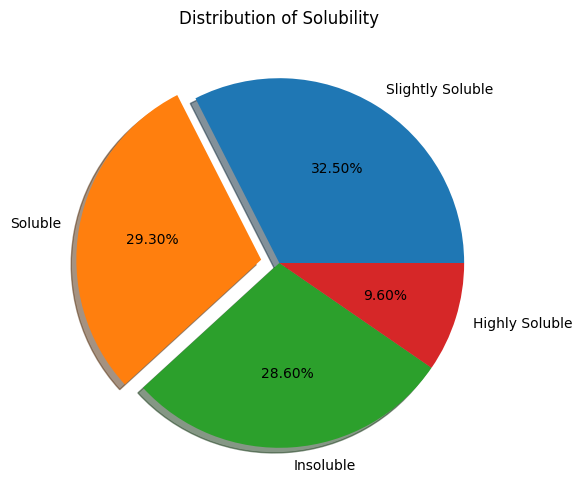

In [29]:
#let's visualize the distribution according to their degree of solubility
degree_of_solubilty = output.Solubility_degree.value_counts()
print(degree_of_solubilty)

#create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    labels = degree_of_solubilty.index,
    x = degree_of_solubilty.values,
    shadow=True,
    autopct = "%.2f%%",
    explode = (0, 0.1,0,0)
)
plt.title('Distribution of Solubility')
plt.savefig('/content/drive/MyDrive/ersilia/figures/1000_Molecules_output_pie_chart.png')
plt.show();

***COMMENTS:***

*   From the graph, we can see that there more compounds that fall within the slightly soluble category.



# Model's Performance Evaluation:

*   To be able to reach a vivid conclusion on the model's bias, we will have to take a peak into evaluating the model's performance by comparing its predicted solubility(LogS) to the actual solubility(Logs) from the 1000 molecules.



In [30]:
# @title ✍️ Let's rename the solubility column from our molecules_df to actual_solubility and that from our output datafram to predicted_solubility
molecules_df.rename(columns={'Solubility': 'actual_solubility'}, inplace=True)
output.rename(columns={'solubility':'predicted_solubility'}, inplace=True)
print(molecules_df.head())
print(output.head())

      actual_solubility                                             smiles  \
1264          -6.377738  COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...   
9895          -2.300000                               CCOc1ccc(NC(C)=O)cc1   
2080          -0.658699        CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O   
5965          -6.493900     CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-]   
4524          -0.388000                                      Cc1cccc(CO)c1   

                        Inchi_Key  
1264  IHRACTUONPFMSI-UHFFFAOYSA-N  
9895  CPJSUEIXXCENMM-UHFFFAOYSA-N  
2080  JVAZJLFFSJARQM-OZRWLHRGSA-N  
5965  OQMBBFQZGJFLBU-UHFFFAOYSA-N  
4524  JJCKHVUTVOPLBV-UHFFFAOYSA-N  
                           key  \
0  IHRACTUONPFMSI-UHFFFAOYSA-N   
1  CPJSUEIXXCENMM-UHFFFAOYSA-N   
2  JVAZJLFFSJARQM-OZRWLHRGSA-N   
3  OQMBBFQZGJFLBU-UHFFFAOYSA-N   
4  JJCKHVUTVOPLBV-UHFFFAOYSA-N   

                                               input  predicted_solubility  \
0  COC(=O)c1cc(N=NC(C(C)=O)C(=O)

In [31]:
# @title Merge ➕ both molecules_df and output into a single DataFrame
merged_pred = pd.merge(output, molecules_df, how='left', left_on='input', right_on='smiles')
merged_pred.head()

,key,input,predicted_solubility,Solubility_degree,actual_solubility,smiles,Inchi_Key
0,IHRACTUONPFMSI-UHFFFAOYSA-N,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,-6.123,Insoluble,-6.377738,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,IHRACTUONPFMSI-UHFFFAOYSA-N
1,CPJSUEIXXCENMM-UHFFFAOYSA-N,CCOc1ccc(NC(C)=O)cc1,-2.316,Slightly Soluble,-2.300000,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N
2,JVAZJLFFSJARQM-OZRWLHRGSA-N,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,-0.484,Soluble,-0.658699,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,JVAZJLFFSJARQM-OZRWLHRGSA-N
3,OQMBBFQZGJFLBU-UHFFFAOYSA-N,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],-6.831,Insoluble,-6.493900,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],OQMBBFQZGJFLBU-UHFFFAOYSA-N
4,JJCKHVUTVOPLBV-UHFFFAOYSA-N,Cc1cccc(CO)c1,-0.709,Soluble,-0.388000,Cc1cccc(CO)c1,JJCKHVUTVOPLBV-UHFFFAOYSA-N


In [32]:
# @title let's drop 🚮 columns like SMILES and InChiKey to avoid redundancy
merged_pred.drop(columns=['smiles', 'Inchi_Key'], axis=1, inplace=True)
merged_pred.head()

,key,input,predicted_solubility,Solubility_degree,actual_solubility
0,IHRACTUONPFMSI-UHFFFAOYSA-N,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,-6.123,Insoluble,-6.377738
1,CPJSUEIXXCENMM-UHFFFAOYSA-N,CCOc1ccc(NC(C)=O)cc1,-2.316,Slightly Soluble,-2.300000
2,JVAZJLFFSJARQM-OZRWLHRGSA-N,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,-0.484,Soluble,-0.658699
3,OQMBBFQZGJFLBU-UHFFFAOYSA-N,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],-6.831,Insoluble,-6.493900
4,JJCKHVUTVOPLBV-UHFFFAOYSA-N,Cc1cccc(CO)c1,-0.709,Soluble,-0.388000


***Comments:***

*   We have Successfully merged both DataFrames into a single DataFrame, 'merged_df', and have equally eliminated the redundant columns.

In [33]:
# @title 🗃️ let's save our new DataFrame into a CSV file called mergerd_predictions
path = '/content/drive/MyDrive/ersilia/data/eos6oli_merged_preds.csv'
merged_pred.to_csv(path, sep=',', index=False, encoding='utf-8')

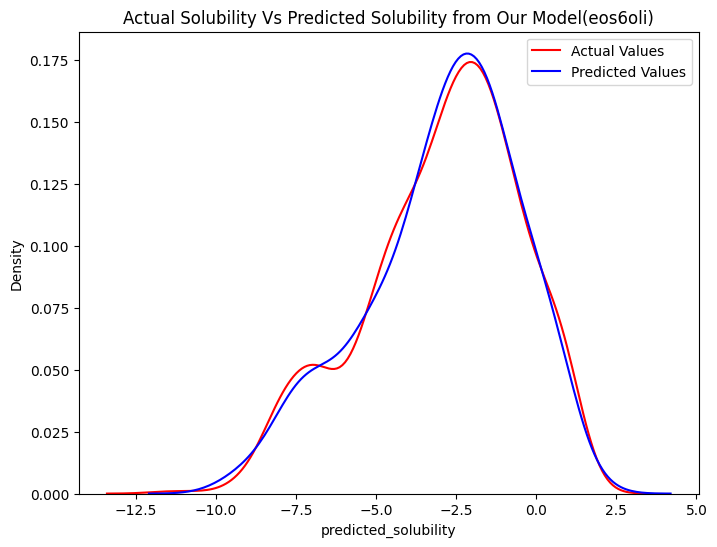

In [34]:
# @title 📈 Let's visualize how close our predicted log of solubility is to the actual log of solubility
fig = plt.figure(figsize=(8,6))
ax = sns.distplot(merged_pred['actual_solubility'], color='r', label='Actual Values', hist=False)
sns.distplot(merged_pred['predicted_solubility'], color='b', label='Predicted Values', hist=False, ax=ax)
plt.title('Actual Solubility Vs Predicted Solubility from Our Model(eos6oli)')
plt.legend()
plt.savefig('/content/drive/MyDrive/ersilia/figures/1000Molecules_dist_plot.png')
plt.show();

**Comments:**

*  From the distplot above, we can clearly see how close our model's predictions are to the actual values. Although, with a more robust hyperparameter tunning, the presence of bias will be reduced drastically and the predictions improved even more.


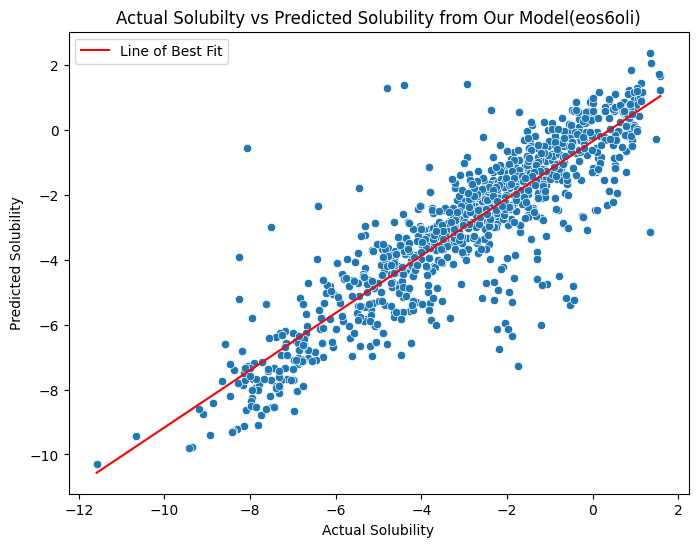

In [35]:
# @title Let's generate a scatter plot to further show how closely related our model's predictions are to the actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_solubility', y='predicted_solubility', data=merged_pred)

#import LinearRegression
from sklearn.linear_model import LinearRegression

# adding a line of best fit
model = LinearRegression()
model.fit(merged_pred[['actual_solubility']], merged_pred['predicted_solubility'])
x_values = np.linspace(merged_pred['actual_solubility'].min(), merged_pred['actual_solubility'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label='Line of Best Fit')

plt.legend()
plt.title('Actual Solubilty vs Predicted Solubility from Our Model(eos6oli)')
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')

plt.savefig('/content/drive/MyDrive/ersilia/figures/1000Molecules_scatter_plot.png')
plt.show()

***comments:***

*   Our scatter plot further confirms how linearly and closely related our predicted values are to the actual values.



---



**Let's look at the residuals of our predictions, which are calculated as the difference between the actual and predicted values:**

Note:

*   Residual is the calculated difference between the predicted values and the actual values.





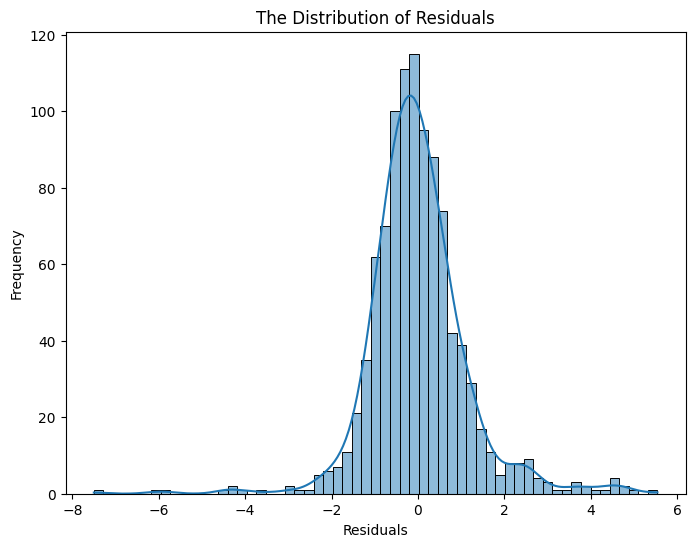

In [36]:
# Let's calculate the residuals
merged_pred['Residuals'] = merged_pred['actual_solubility'] - merged_pred['predicted_solubility']

# Create histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(merged_pred['Residuals'], kde=True)
plt.title('The Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig('/content/drive/MyDrive/ersilia/figures/1000Molecules_resid_plot.png')
plt.show()

***Comments***

*   From the visualisation of our residuals, we can confirm that the majority of the predictions differed only from the actual values by approximately –1.8

---



# **Conclusion:**

*   From the evaluation of our model's(eos6oli) performance on predicting with a randomly sampled 1000 molecules, we can see that the model's bias isn't much and can be improved upon with a more robust model tunning.

*   Overall, our model did a niece job with the predictions.



